# Supervised Learning - Project

In this Project, we are going to perform a full supervised learning machine learning project on a "Diabetes" dataset. This dataset is originally from the National Institute of Diabetes and Digestive and Kidney
Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes,
based on certain diagnostic measurements included in the dataset. 

[Kaggle Dataset](https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset)

# Part I : EDA - Exploratory Data Analysis

For this task, you are required to conduct an exploratory data analysis on the diabetes dataset. You have the freedom to choose the visualizations you want to use, but your analysis should cover the following tasks mostly:

- Are there any missing values in the dataset?
- How are the predictor variables related to the outcome variable?
- What is the correlation between the predictor variables?
- What is the distribution of each predictor variable?
- Are there any outliers in the predictor variables?
- How are the predictor variables related to each other?
- Is there any interaction effect between the predictor variables?
- What is the average age of the individuals in the dataset?
- What is the average glucose level for individuals with diabetes and without diabetes?
- What is the average BMI for individuals with diabetes and without diabetes?
- How does the distribution of the predictor variables differ for individuals with diabetes and without diabetes?
- Are there any differences in the predictor variables between males and females (if gender information is available)?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
df = pd.read_csv('diabetes.csv')
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


There are no missing values in the dataset!

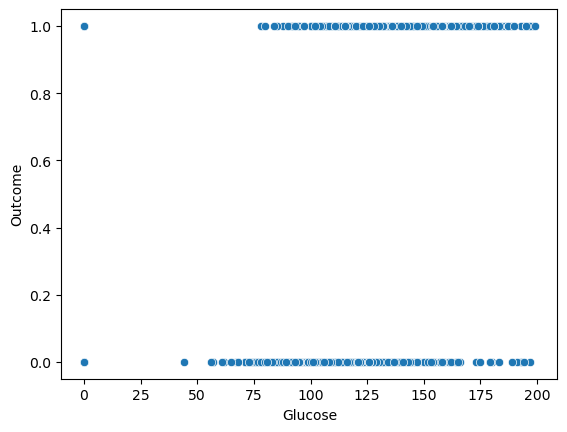

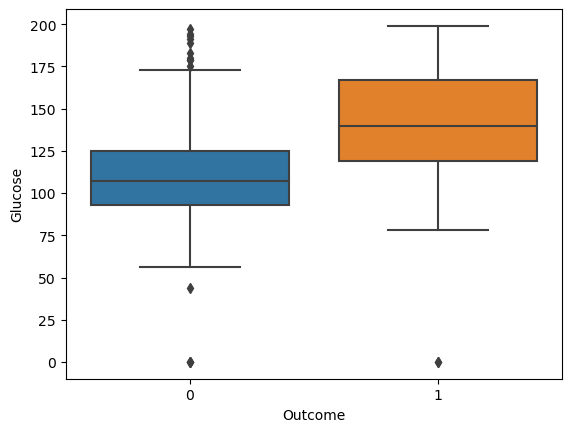

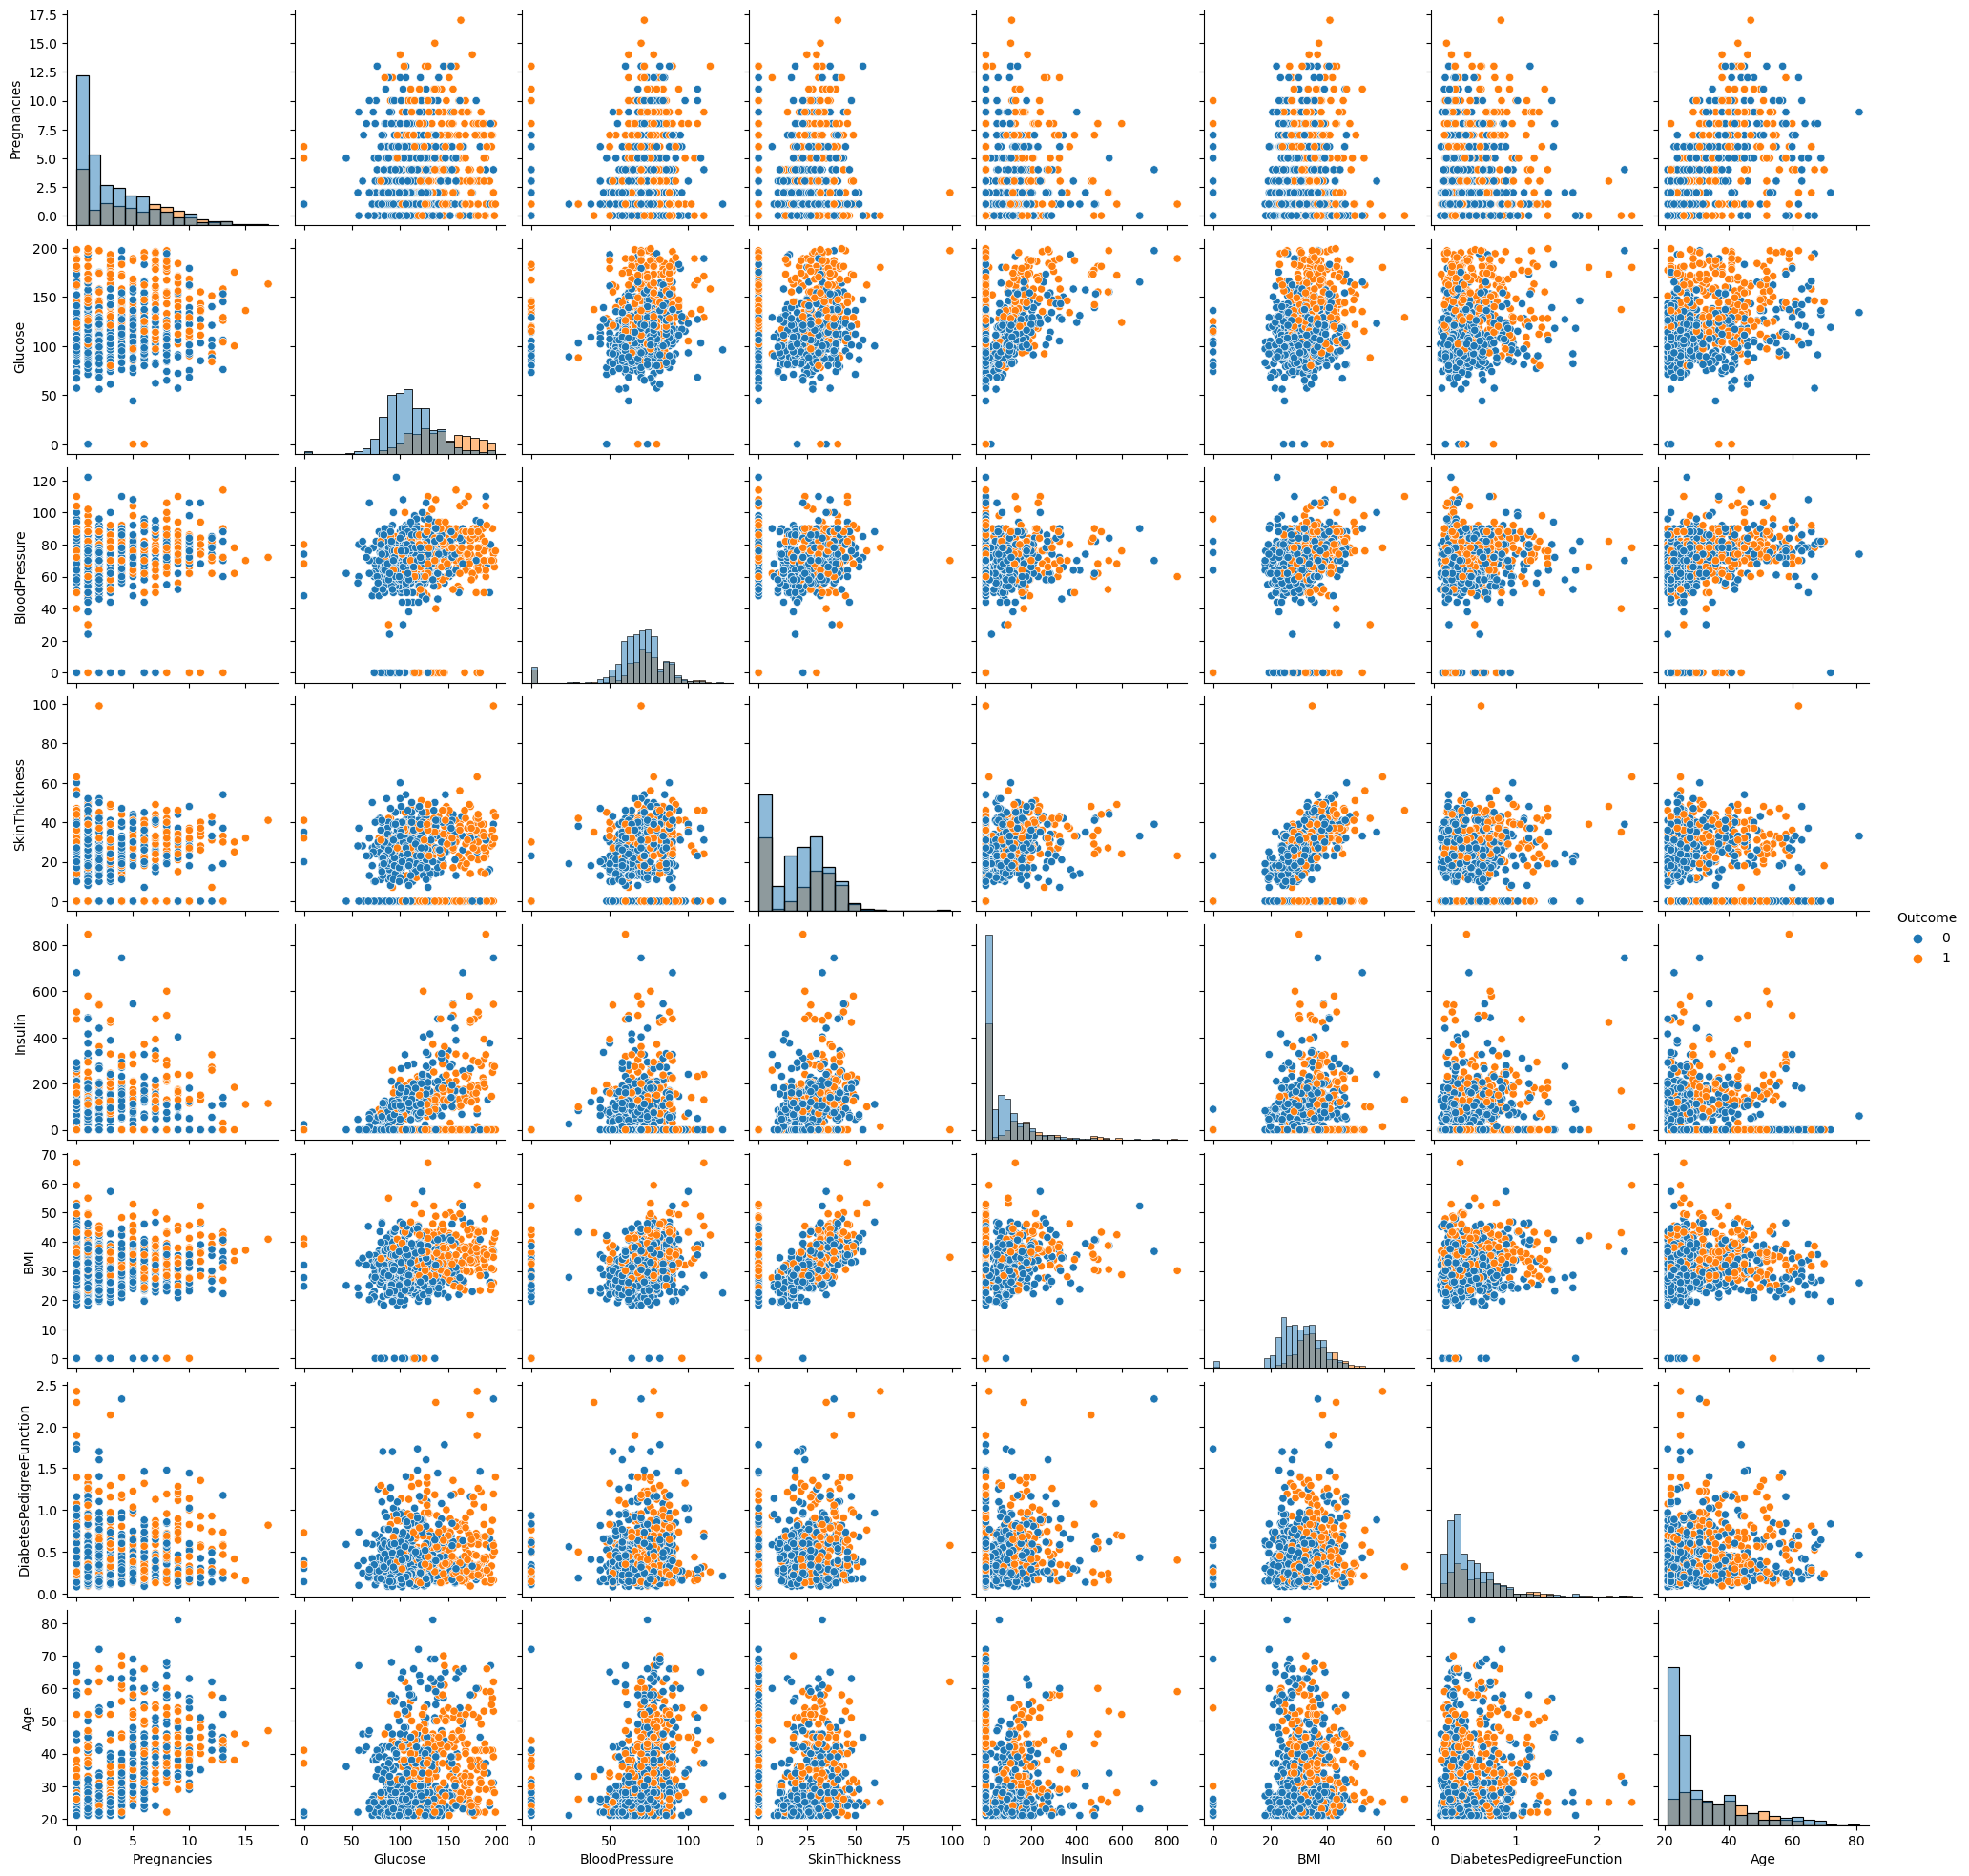

In [4]:
# Use visualization to explore relationships - predictor values to outcome variable

# Scatter plot
sns.scatterplot(x='Glucose', y='Outcome', data=df)
plt.show()

# Box plot
sns.boxplot(x='Outcome', y='Glucose', data=df)
plt.show()

# Pair plot
sns.pairplot(df, hue='Outcome', diag_kind='hist')
plt.show()

In [5]:
# Correlation analysis
correlations = df.corr()
correlation_with_outcome = correlations['Outcome'].drop('Outcome')
correlation_with_outcome

Pregnancies                 0.221898
Glucose                     0.466581
BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Name: Outcome, dtype: float64

Glucose seems to be the highest indicator (0.467) of a person with diabetes, with BMI being the 2nd indicator (0.293).
This means Glucose and BMI have a moderate positive correlation.

Looking at the box and whisker plot, with the exception of 1 outlier, most people with diabetes has high glucose levels.

This makes sense because high blood sugar directly contributes to diabetes.

In [6]:
df.corr()

Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221071                  0.137337   
BloodPressure             0.088933  0.281805                  0.041265   
SkinThickness             0.436783  0.392573                  0.183928   
Insulin                   1.000000  0.197859                  0.185071   
BMI                       0.197859  1.000000                  0.140647   
DiabetesPedigreeFunction  0.185071  0.140647                  1.000000   
Age                      -0.042163  0.036242                  0.033561   
Outcome                   0.130548  0.292695                  0.173844   

                               Age   Outcome  
Pregnancies               0.544341  0.221898  
Glucose                   0.263514  0.466581  
BloodPressure             0.239528  0.065068  
SkinThickness            -0.113970  0.074752  
Insulin                  -0.042163  0.130548  
BMI                       0.036242  0.292695  
DiabetesPedigreeFunction  0.033561  0.173844  
Age                       1.000000  0.238356  
Outcome                   0.238356  1.000000

<Figure size 800x500 with 0 Axes>

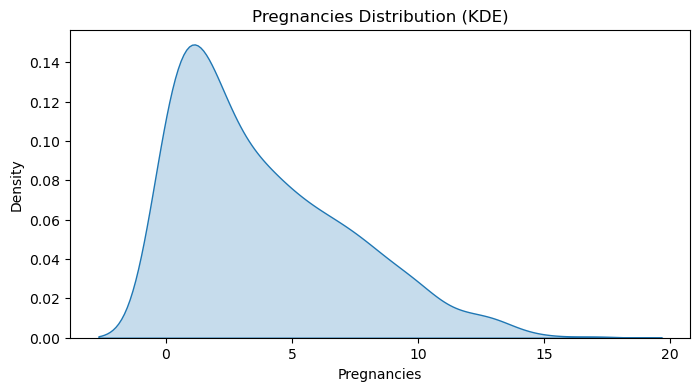

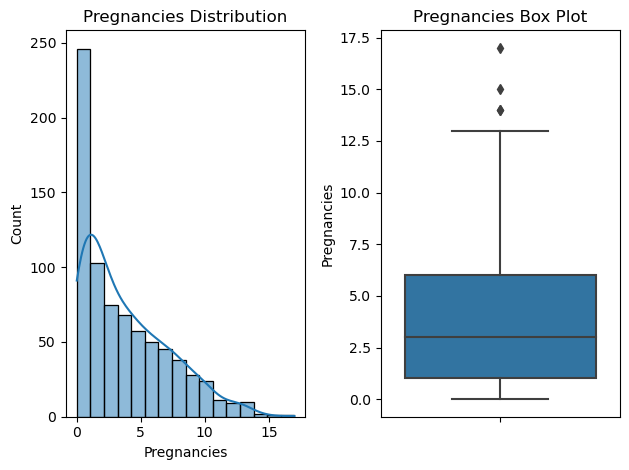

<Figure size 800x500 with 0 Axes>

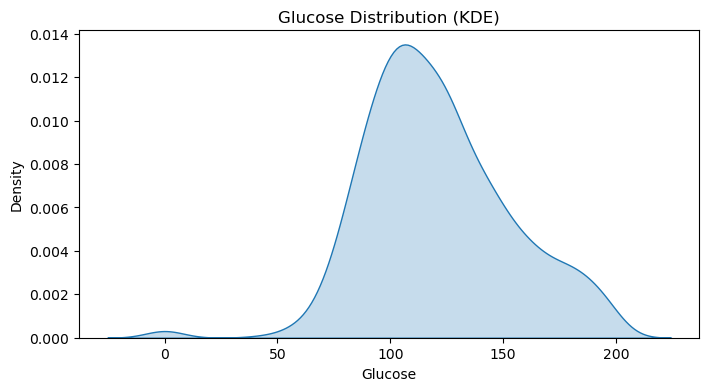

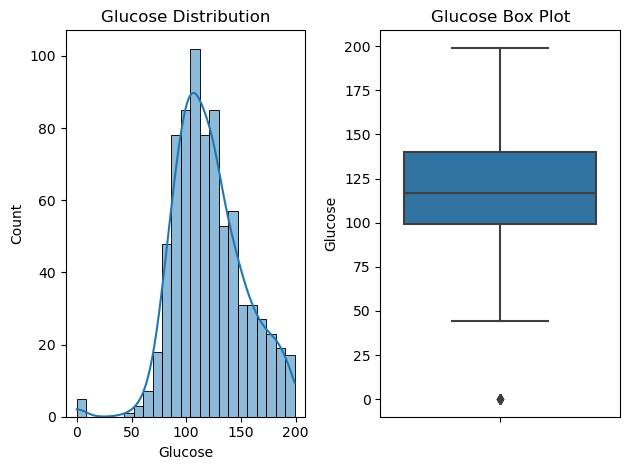

<Figure size 800x500 with 0 Axes>

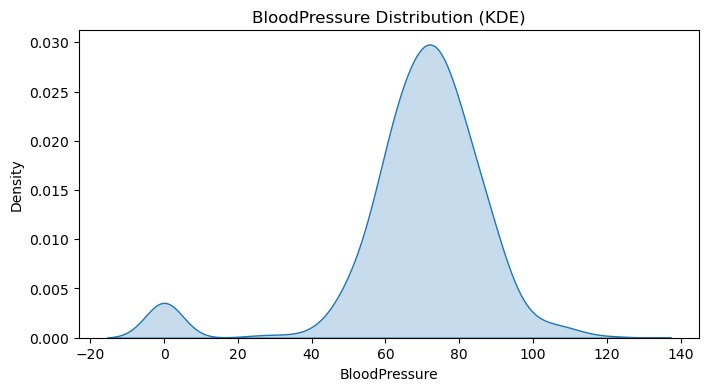

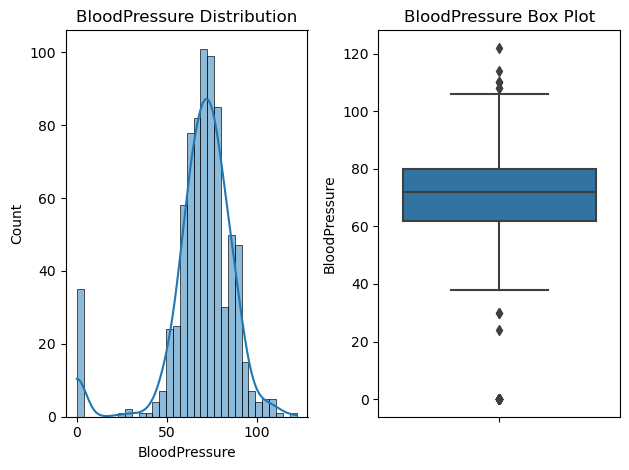

<Figure size 800x500 with 0 Axes>

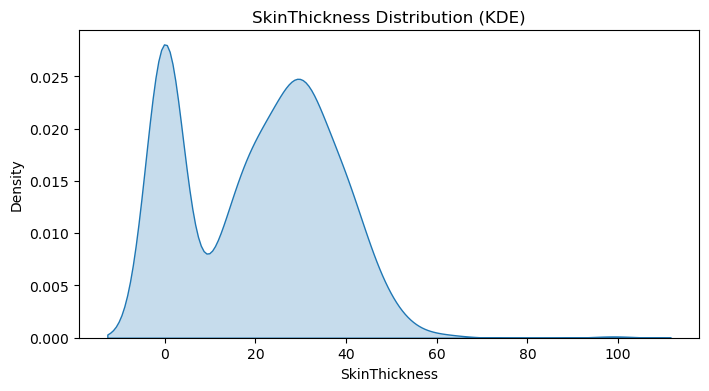

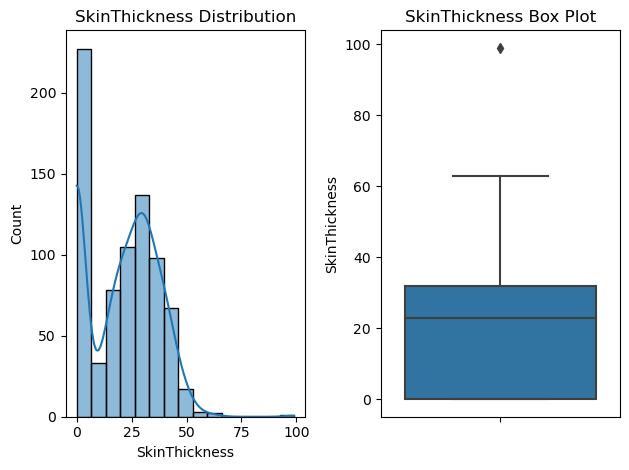

<Figure size 800x500 with 0 Axes>

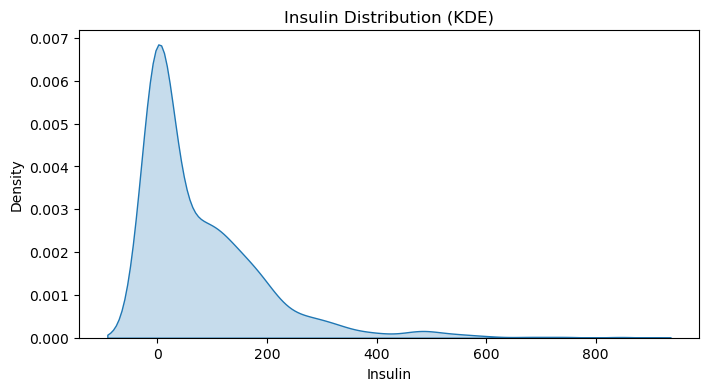

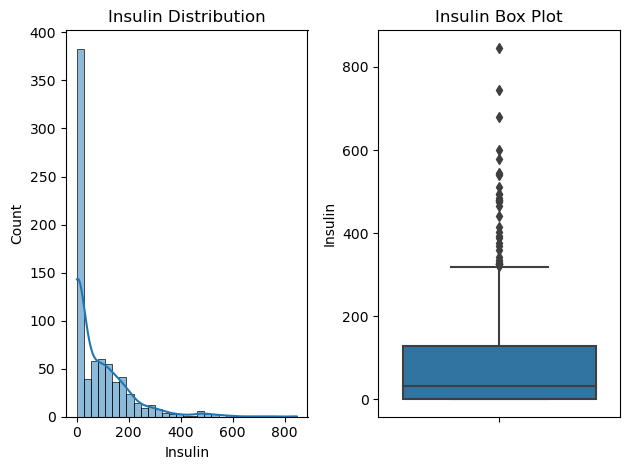

<Figure size 800x500 with 0 Axes>

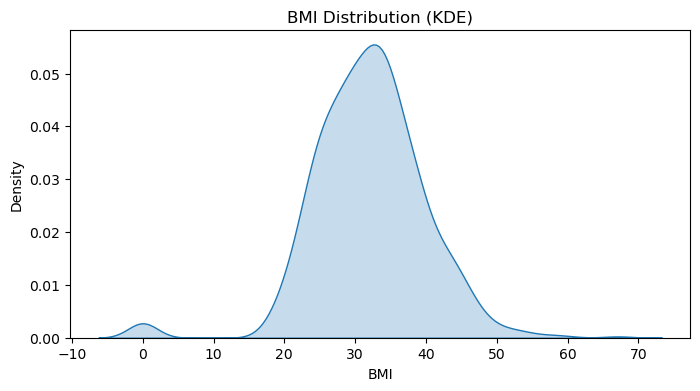

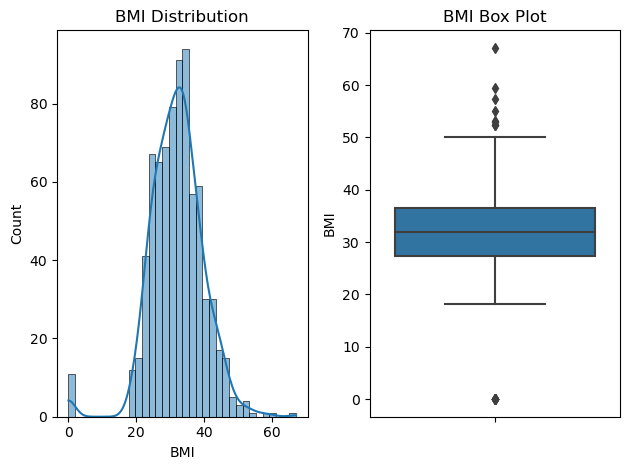

<Figure size 800x500 with 0 Axes>

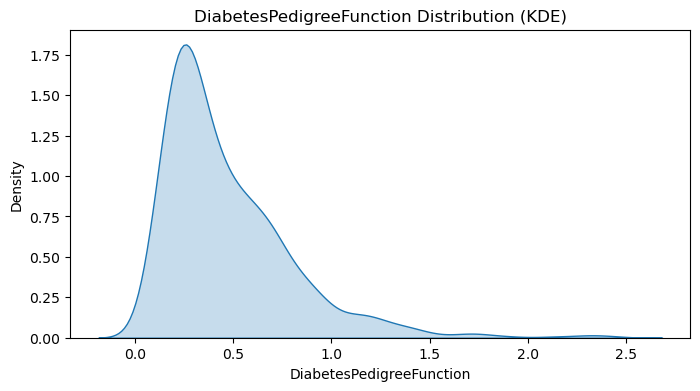

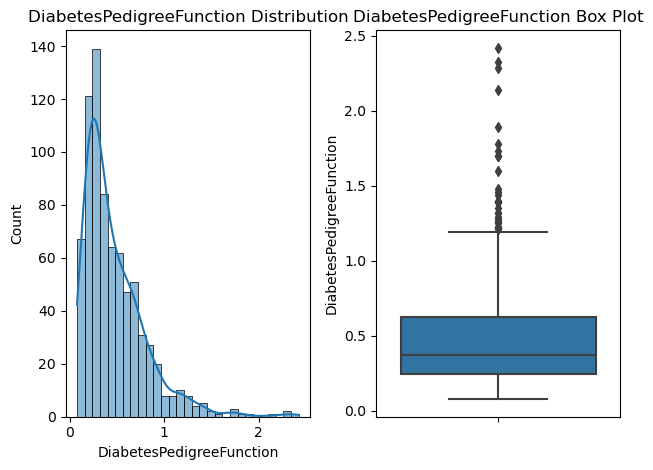

<Figure size 800x500 with 0 Axes>

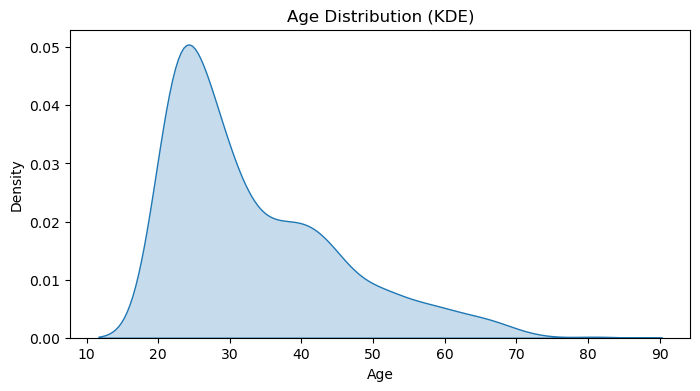

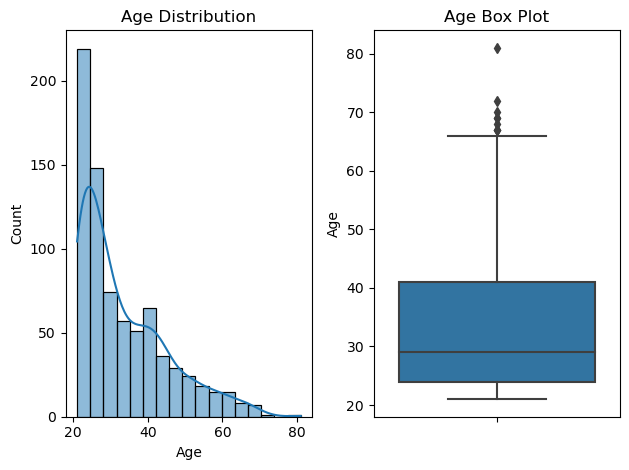

In [7]:
# Column names from the dataframe to use as predictor variables
predictor_variables = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Loop through each predictor variable and create visualizations
for variable in predictor_variables:
    plt.figure(figsize=(8, 5))
    
    # Kernel Density Plot
    plt.figure(figsize=(8, 4))
    sns.kdeplot(data=df, x=variable, fill=True)
    plt.title(f'{variable} Distribution (KDE)')
    plt.show()
    
    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data=df, x=variable, kde=True)
    plt.title(f'{variable} Distribution')
    
    # Box plot
    plt.subplot(1, 2, 2)
    sns.boxplot(data=df, y=variable)
    plt.title(f'{variable} Box Plot')
    
    plt.tight_layout()
    plt.show()

There are various amounts of outliers as seen on the box/whisker plots, for a most of the predictor variables.

In [8]:
# Visualize the df for correlations
df.corr()

Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221071                  0.137337   
BloodPressure             0.088933  0.281805                  0.041265   
SkinThickness             0.436783  0.392573                  0.183928   
Insulin                   1.000000  0.197859                  0.185071   
BMI                       0.197859  1.000000                  0.140647   
DiabetesPedigreeFunction  0.185071  0.140647                  1.000000   
Age                      -0.042163  0.036242                  0.033561   
Outcome                   0.130548  0.292695                  0.173844   

                               Age   Outcome  
Pregnancies               0.544341  0.221898  
Glucose                   0.263514  0.466581  
BloodPressure             0.239528  0.065068  
SkinThickness            -0.113970  0.074752  
Insulin                  -0.042163  0.130548  
BMI                       0.036242  0.292695  
DiabetesPedigreeFunction  0.033561  0.173844  
Age                       1.000000  0.238356  
Outcome                   0.238356  1.000000

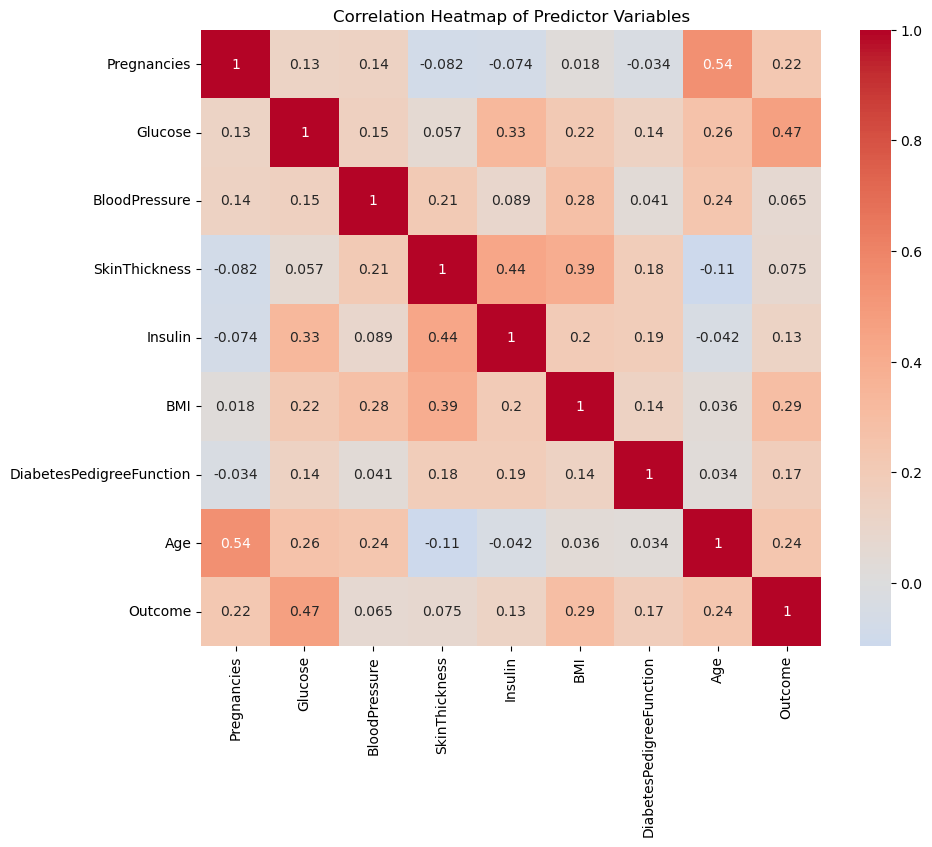

In [9]:
# Use a heatmap to plot the above correlations
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap of Predictor Variables")
plt.show()

In [10]:
# Interact Glucose and BMI
df['Glucose_BMI'] = df['Glucose'] * df['BMI']

model = sm.Logit(df['Outcome'], sm.add_constant(df[['Glucose', 'BMI', 'Glucose_BMI']]))
result = model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.501068
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      764
Method:                           MLE   Df Model:                            3
Date:                Tue, 22 Aug 2023   Pseudo R-squ.:                  0.2253
Time:                        23:33:45   Log-Likelihood:                -384.82
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 2.963e-48
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -10.3249      2.227     -4.636      0.000     -14.690      -5.960
Glucose         0.0576    

In [11]:
# Average age of individuals
df['Age'].mean()

33.240885416666664

In [12]:
# Average glucose level for people with diabetes
avg_glucose_diabetes = df[df['Outcome'] == 1]['Glucose'].mean()

print("Average Glucose level for people with diabetes:", avg_glucose_diabetes)

# Average glucose level for people without diabetes
avg_glucose_no_diabetes = df[df['Outcome'] == 0]['Glucose'].mean()

print("Average Glucose level for people without diabetes:", avg_glucose_no_diabetes)

Average Glucose level for people with diabetes: 141.25746268656715
Average Glucose level for people without diabetes: 109.98


In [13]:
# Average BMI for people with diabetes
avg_BMI_diabetes = df[df['Outcome'] == 1]['BMI'].mean()

print("Average BMI for people with diabetes:", avg_BMI_diabetes)

# Average glucose level for people without diabetes
avg_BMI_no_diabetes = df[df['Outcome'] == 0]['BMI'].mean()

print("Average BMI for people without diabetes:", avg_BMI_no_diabetes)

Average BMI for people with diabetes: 35.14253731343284
Average BMI for people without diabetes: 30.3042


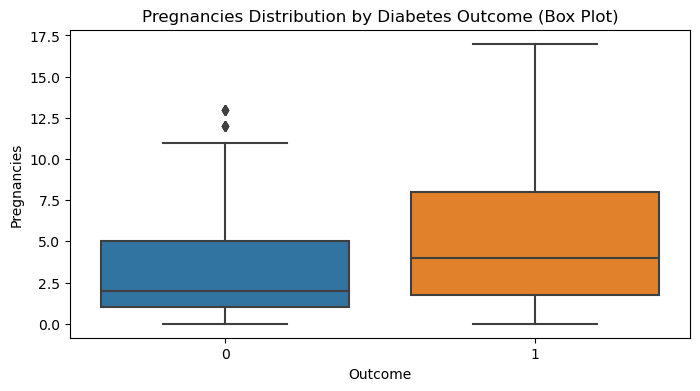

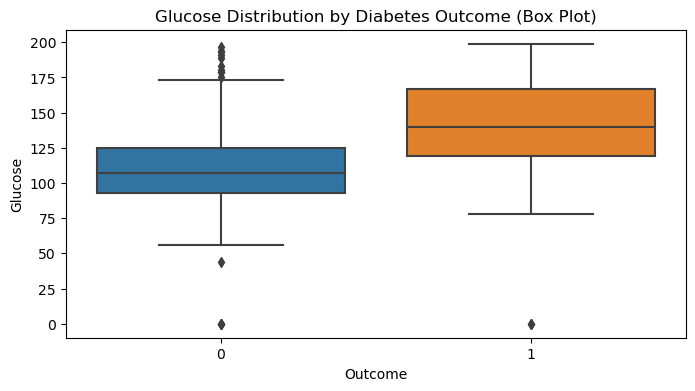

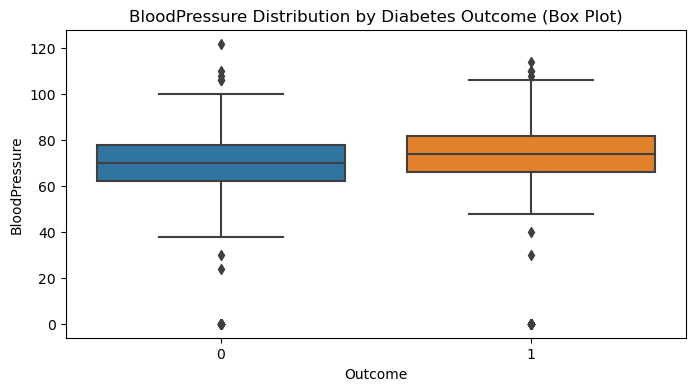

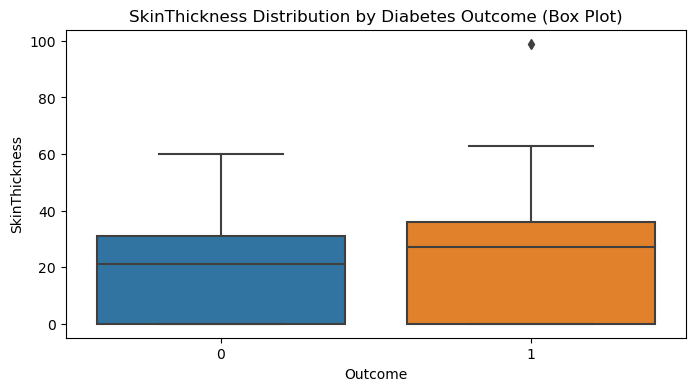

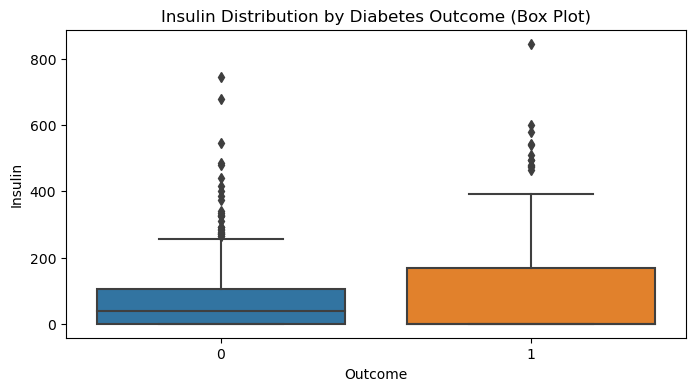

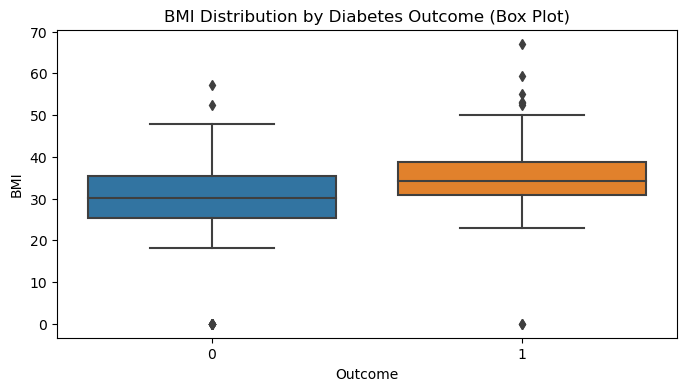

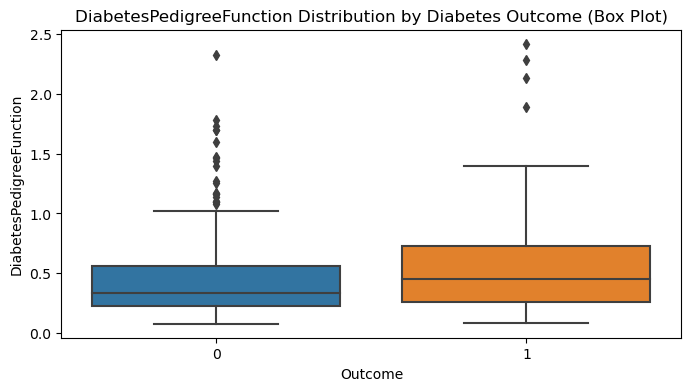

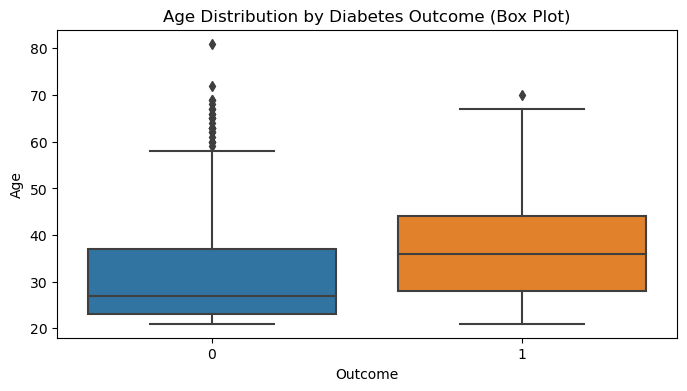

In [14]:
# Side-by-side box plots for each predictor variable
for variable in predictor_variables:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x='Outcome', y=variable)
    plt.title(f'{variable} Distribution by Diabetes Outcome (Box Plot)')
    plt.show()

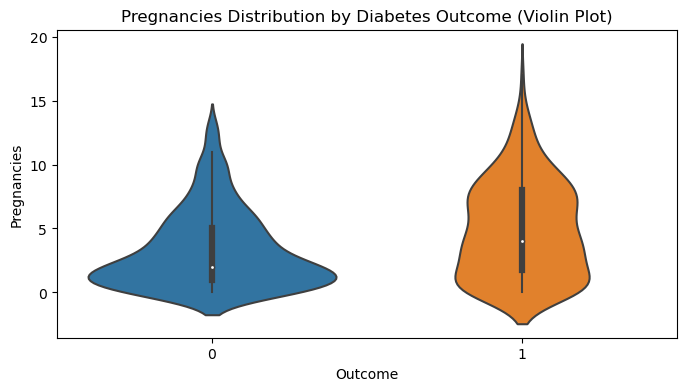

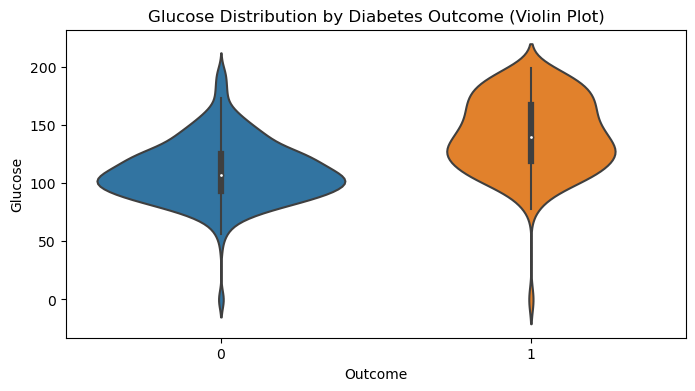

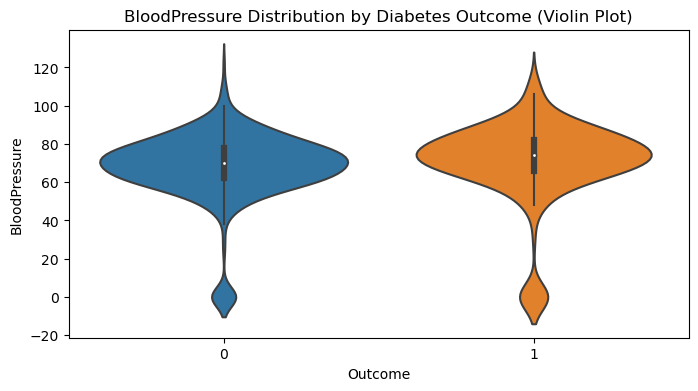

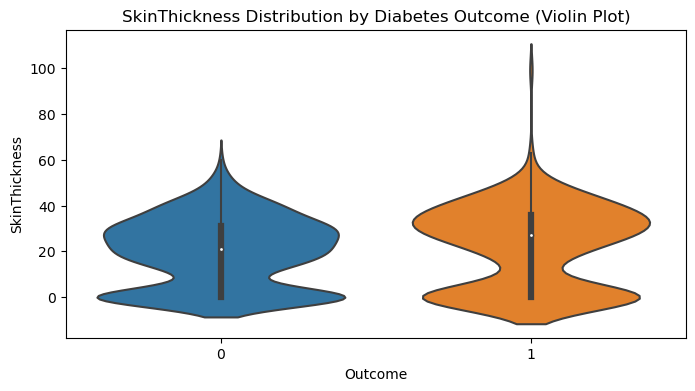

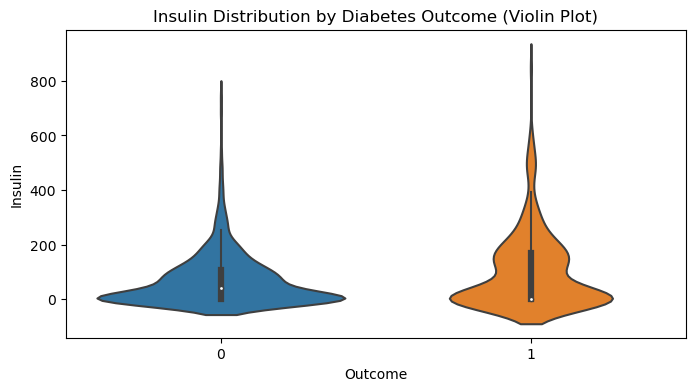

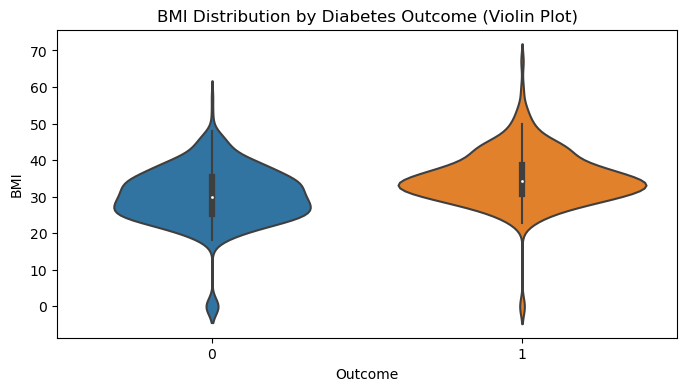

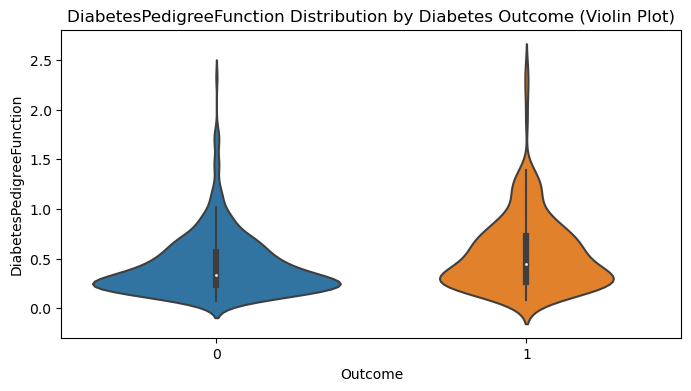

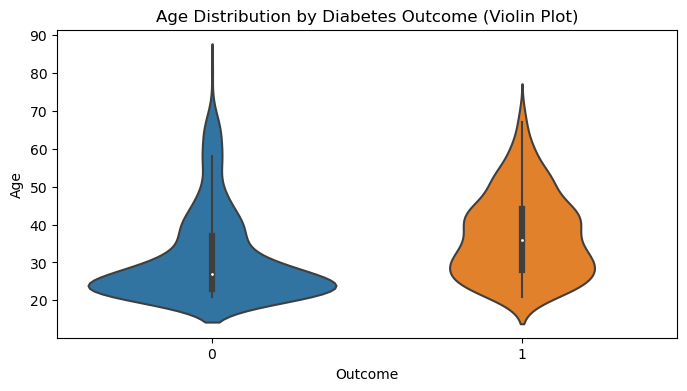

In [15]:
# Side-by-side violin plots for each predictor variable
for variable in predictor_variables:
    plt.figure(figsize=(8, 4))
    sns.violinplot(data=df, x='Outcome', y=variable)
    plt.title(f'{variable} Distribution by Diabetes Outcome (Violin Plot)')
    plt.show()

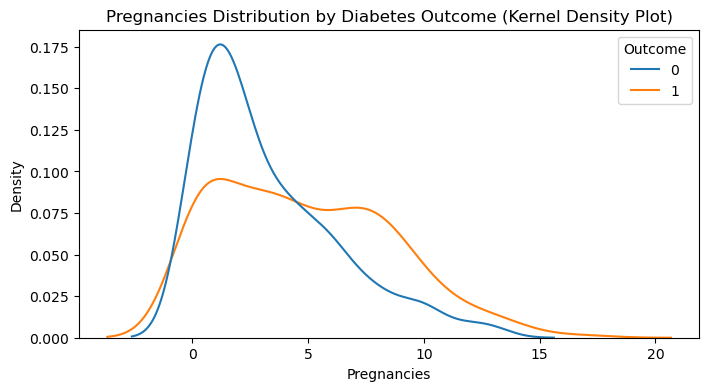

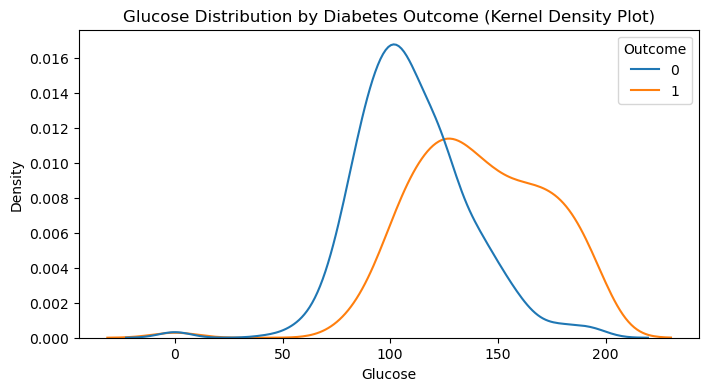

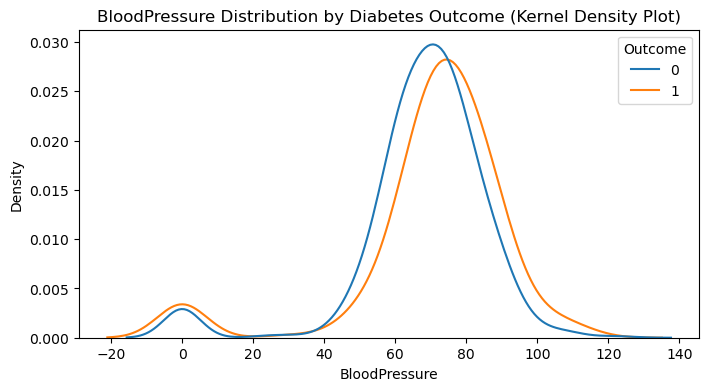

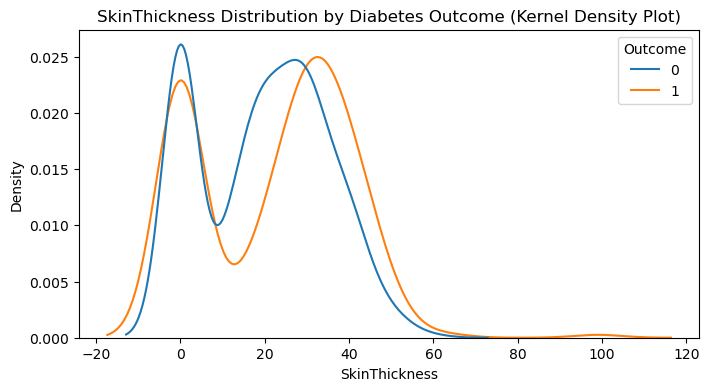

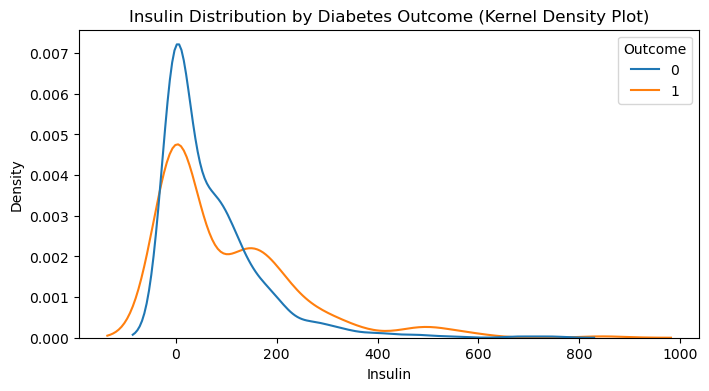

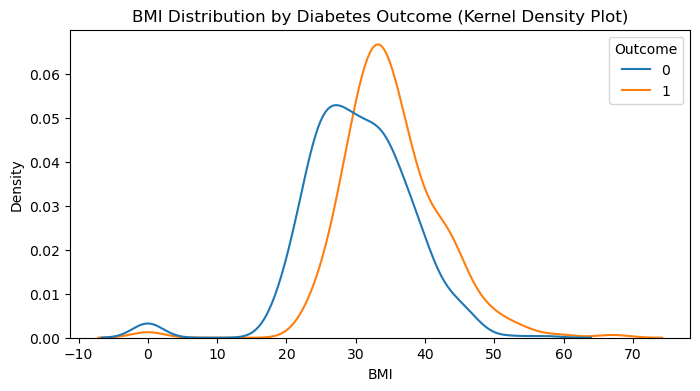

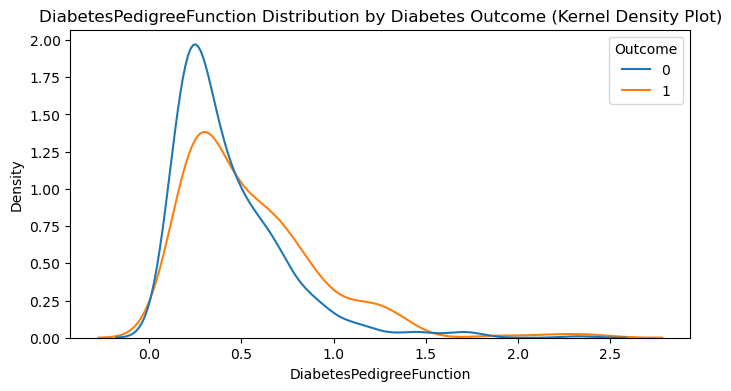

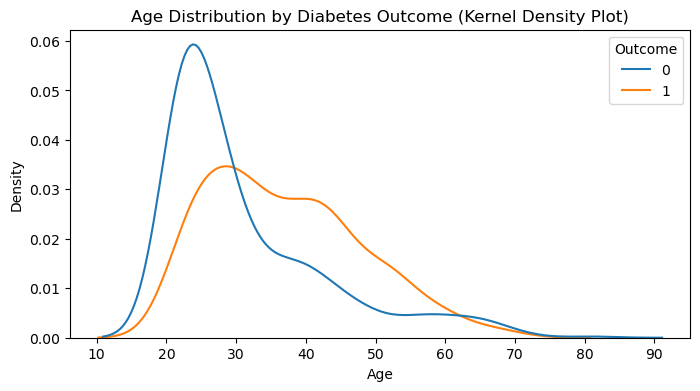

In [16]:
# one more set of visualizations: Kernel Density
for variable in predictor_variables:
    plt.figure(figsize=(8, 4))
    sns.kdeplot(data=df, x=variable, hue='Outcome', common_norm=False)
    plt.title(f'{variable} Distribution by Diabetes Outcome (Kernel Density Plot)')
    plt.show()

# Part II : Preprocessing & Feature Engineering

You need to perform preprocessing on the given dataset. Please consider the following tasks and carry out the necessary steps accordingly.
- Handling missing values
- Handling outliers
- Scaling and normalization
- Feature Engineering
- Handling imbalanced data

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
 9   Glucose_BMI               768 non-null    float64
dtypes: float64(3), int64(7)
memory usage: 60.1 KB


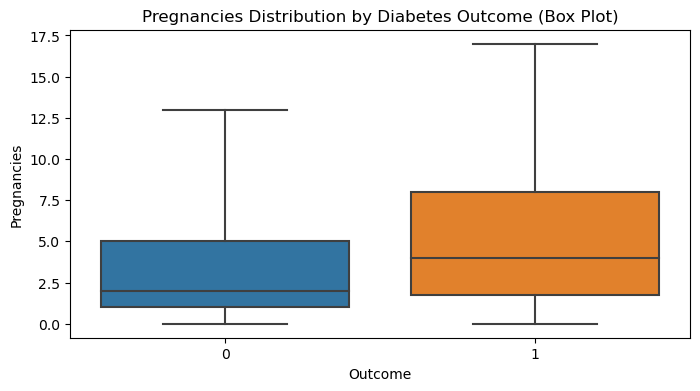

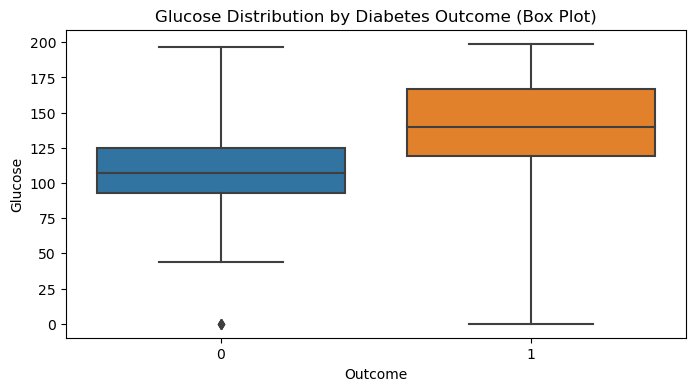

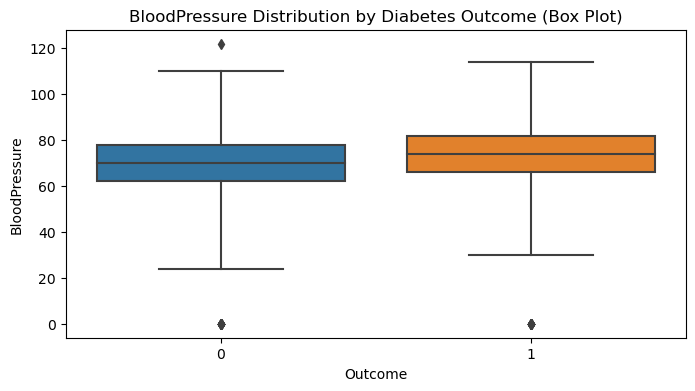

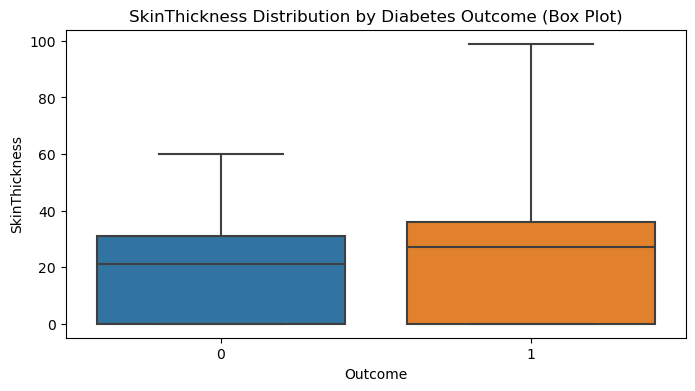

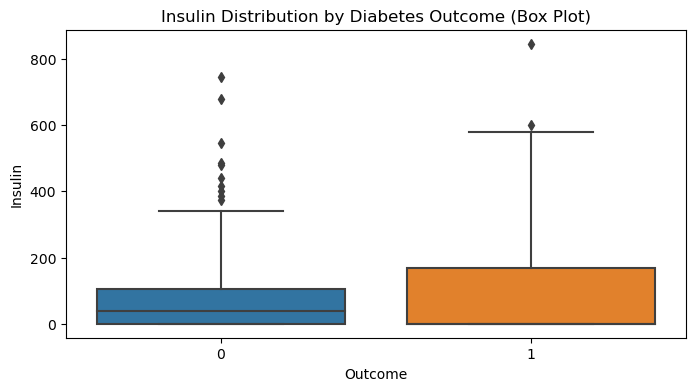

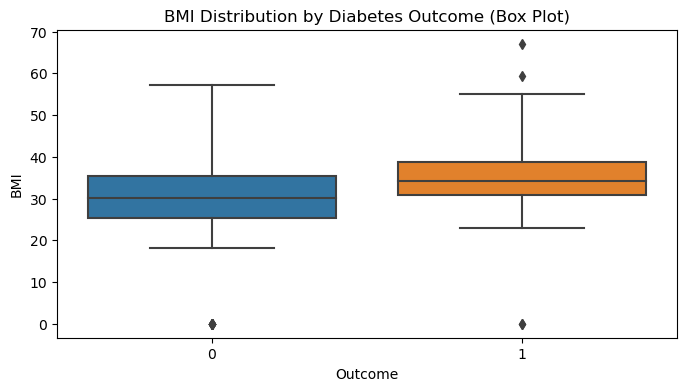

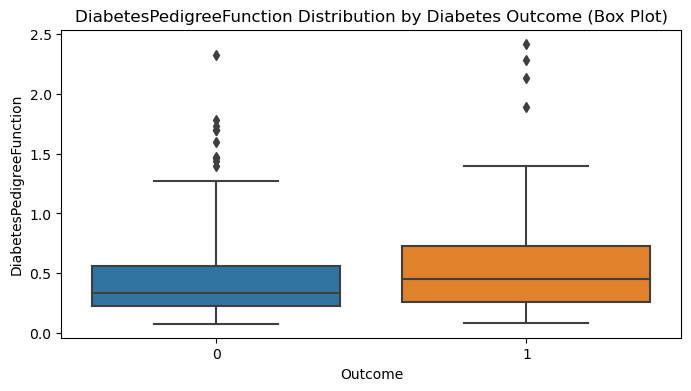

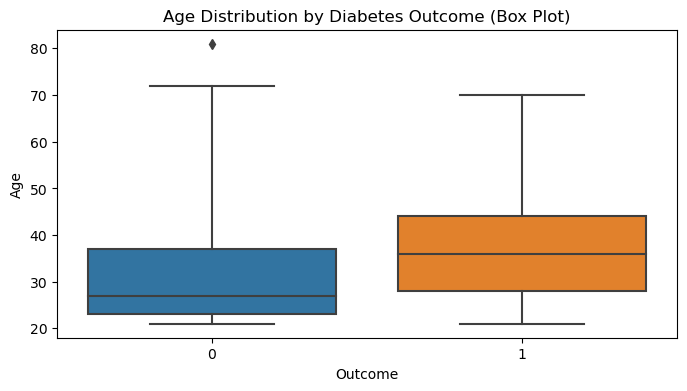

In [18]:
# Side-by-side box plots with extended whiskers to account for more data
for variable in predictor_variables:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x='Outcome', y=variable, whis=2.5) 
    plt.title(f'{variable} Distribution by Diabetes Outcome (Box Plot)')
    plt.show()

In [19]:
# Min/max scaler sklearn

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[['Glucose', 'BMI']])

In [20]:
scaled_data

array([[0.74371859, 0.50074516],
       [0.42713568, 0.39642325],
       [0.91959799, 0.34724292],
       ...,
       [0.6080402 , 0.390462  ],
       [0.63316583, 0.4485842 ],
       [0.46733668, 0.45305514]])

##### NOTE: df['Glucose_BMI'] was created in last step and will be used as our feature engineering step.

In [37]:
from sklearn.datasets import make_classification

# Create a synthetic imbalanced dataset
X, y = make_classification(n_samples=1000, n_features=10, weights=[0.1, 0.9], random_state=42)

# Convert to df for easier manipulation
data = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(X.shape[1])])
data['target'] = y

# Display class distribution before under-sampling
print("Class distribution before under-sampling:")
print(data['target'].value_counts())

# Calculate desired sample size for the minority class
desired_sample_size = data['target'].value_counts().min()

# Perform Stratified Under-Sampling
under_sampled_df = data.groupby('target').apply(lambda x: x.sample(n=desired_sample_size, random_state=42))

# Reset index
under_sampled_df = under_sampled_df.reset_index(drop=True)

# Display class distribution after under-sampling
print("\nClass distribution after under-sampling:")
print(under_sampled_df['target'].value_counts())

Class distribution before under-sampling:
1    895
0    105
Name: target, dtype: int64

Class distribution after under-sampling:
0    105
1    105
Name: target, dtype: int64


In [38]:
under_sampled_df

feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
0     0.185159  -1.111458   0.063819   0.246505   1.281644   0.557691   
1     0.531307   0.265362   0.371714  -0.582759   0.390465  -0.103222   
2     0.816378  -0.810858   0.708770  -1.257578   1.580541  -1.015094   
3     0.369739  -0.138512   0.730618  -0.423890   0.709353   0.019458   
4    -0.080045  -0.641081   0.255523   0.659054  -0.775875   0.078964   
..         ...        ...        ...        ...        ...        ...   
205  -0.190468  -0.838501  -0.189399  -0.742487   0.334327  -0.289981   
206  -0.735580  -0.331308  -0.771499  -0.612237   0.570613   0.968185   
207  -2.190221  -0.431456  -1.875486  -2.120087  -0.528998  -1.075737   
208  -0.649969  -0.451159  -0.877851   0.551741  -1.519346  -2.832156   
209   0.019328  -0.665422  -0.373470   0.721903  -1.497258   1.280940   

     feature_6  feature_7  feature_8  feature_9  target  
0     0.073398   1.140149  -0.530769   0.498222       0  
1    -0.365368  -0.134279  -0.906845  -2.438817       0  
2    -0.981703   0.466358  -0.943778  -0.234020       0  
3    -1.695646   1.046912   0.910897  -0.305189       0  
4    -0.896403   0.599578   1.154470   1.026895       0  
..         ...        ...        ...        ...     ...  
205   0.302453  -3.601085   0.141655  -0.214538       1  
206   1.290369  -0.825411   0.416225  -1.085151       1  
207   2.554232  -0.310938   2.617101  -0.736064       1  
208   1.739243  -0.463161  -0.273079   1.200262       1  
209   1.168649   0.668840  -1.297413  -1.269999       1  

[210 rows x 11 columns]

# Part III : Training ML Model

For this task, you are required to build a machine learning model to predict the outcome variable. This will be a binary classification task, as the target variable is binary. You should select at least two models, one of which should be an ensemble model, and compare their performance.

- Train the models: Train the selected models on the training set.
- Model evaluation: Evaluate the trained models on the testing set using appropriate evaluation metrics, such as accuracy, precision, recall, F1-score, and ROC-AUC.
- Model comparison: Compare the performance of the selected models and choose the best-performing model based on the evaluation metrics. You can also perform additional analysis, such as model tuning and cross-validation, to improve the model's performance.

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [40]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(under_sampled_df.drop('target', axis=1), under_sampled_df['target'], test_size=0.2, random_state=42)

# Initialize the models
logreg_model = LogisticRegression(random_state=42)
rf_model = RandomForestClassifier(random_state=42)

# Train the models
logreg_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Make predictions
logreg_preds = logreg_model.predict(X_test)
rf_preds = rf_model.predict(X_test)

# Evaluate model performance
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred)
    return accuracy, precision, recall, f1, roc_auc

logreg_metrics = evaluate_model(y_test, logreg_preds)
rf_metrics = evaluate_model(y_test, rf_preds)

# Display model performance
print("Logistic Regression Metrics:", logreg_metrics)
print("Random Forest Metrics:", rf_metrics)

Logistic Regression Metrics: (0.9523809523809523, 0.9565217391304348, 0.9565217391304348, 0.9565217391304348, 0.9519450800915333)
Random Forest Metrics: (0.9285714285714286, 0.9545454545454546, 0.9130434782608695, 0.9333333333333332, 0.9302059496567506)


In [42]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to tune
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Initialize GridSearchCV
grid_search = GridSearchCV(LogisticRegression(random_state=42), param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'C': 0.01}
Best Score: 0.833511586452763


In [43]:
from sklearn.model_selection import cross_val_score

# Cross-validation for Logistic Regression
logreg_scores = cross_val_score(logreg_model, X_train, y_train, cv=5, scoring='accuracy')

# Cross-validation for Random Forest
rf_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')

print("Logistic Regression Cross-Validation Scores:", logreg_scores)
print("Random Forest Cross-Validation Scores:", rf_scores)

Logistic Regression Cross-Validation Scores: [0.73529412 0.79411765 0.82352941 0.90909091 0.81818182]
Random Forest Cross-Validation Scores: [0.76470588 0.85294118 0.85294118 0.87878788 0.81818182]


# Part IV : Conclusion

From the machine learning models developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

-  Certain predictor variables like Glucose and BMI have a stronger positive correlation with Outcome (indicating diabetes) compared to other predictors. These variables could be considered as key indicators in predicting diabetes risk.
- by applying under-sampling - this balanced out the distribution. This improved the ML ability and resulted in better predictions.
- comparing Logistic Regression and Random Forest models, the scores were generally better for the RF data, indicating that it was better for our data.
- EDA revealed that Age has a positive correlation with Outcome. This indicates that older individuals are more likely to have diabetes. 